# Exercise 8: BH irreducible mass

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define $f= M_{\rm irr}/M$

Suppose you have repeated measurment of $M$ and $\chi$. This is just because we're still frequentists for now. When we put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. (At home...)  Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint 1*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Hint 2*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If yes please tell me!)
\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}


Text(0, 0.5, 'freq')

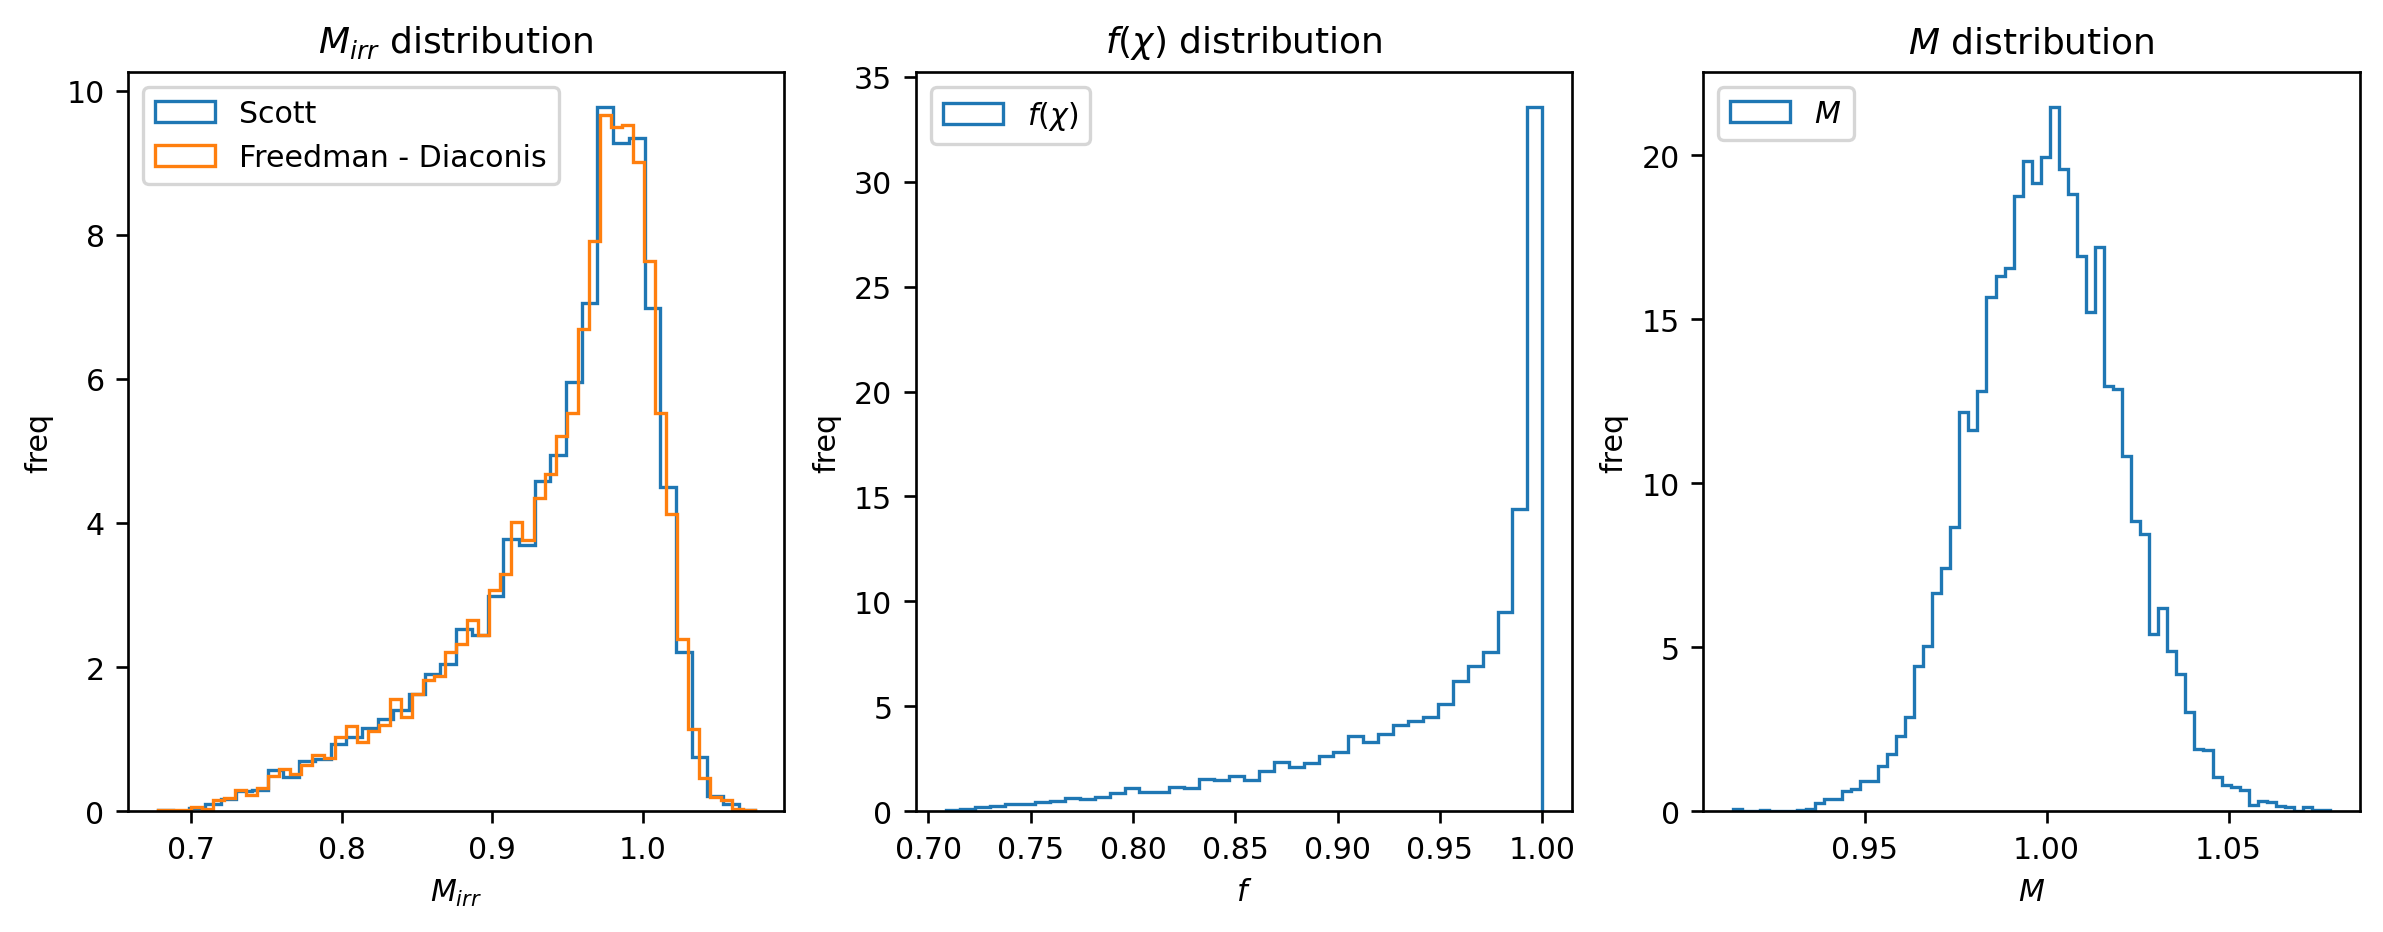

In [187]:
import numpy as np
import pylab as plt
from scipy.stats import norm, uniform

seed = 404

sigma = 0.02
mu = 1

n = 10000 # number of samples

spin = uniform.rvs(size = n, random_state = seed)
mass = norm(loc=mu, scale = sigma).rvs(size=n)

f = np.sqrt((1+np.sqrt(1-spin**2))/2)
m_irr = mass * f

#-------  Plt params  ----------------
%config InlineBackend.figure_format='retina'
plt.rc('figure', figsize=(12, 4), dpi=120)
plt.rcParams.update({'font.size': 9})
#--------------------------------------------

fig, ax = plt.subplots(1,3)

# ax[0].hist(m_irr, bins=60, density=True, histtype='step', label='manual')
ax[0].hist(m_irr, bins='scott', density=True, histtype='step', label='Scott')
ax[0].hist(m_irr, bins='fd', density=True, histtype='step', label='Freedman - Diaconis')
ax[0].set_title(r'$M_{irr}$ distribution')
ax[0].legend(loc='upper left')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel('freq')

ax[1].hist(f, bins='fd', density=True, histtype='step', label=r'$f(\chi)$')
ax[1].set_title(r'$f(\chi)$ distribution')
ax[1].legend(loc='upper left')
ax[1].set_xlabel(r'$f $')
ax[1].set_ylabel('freq')

ax[2].hist(mass, bins='fd', density=True, histtype='step', label=r'$M$')
ax[2].set_title(r'$M $ distribution')
ax[2].legend(loc='upper left')
ax[2].set_xlabel(r'$M $')
ax[2].set_ylabel('freq')



Let's see how kde approximates the distribution:

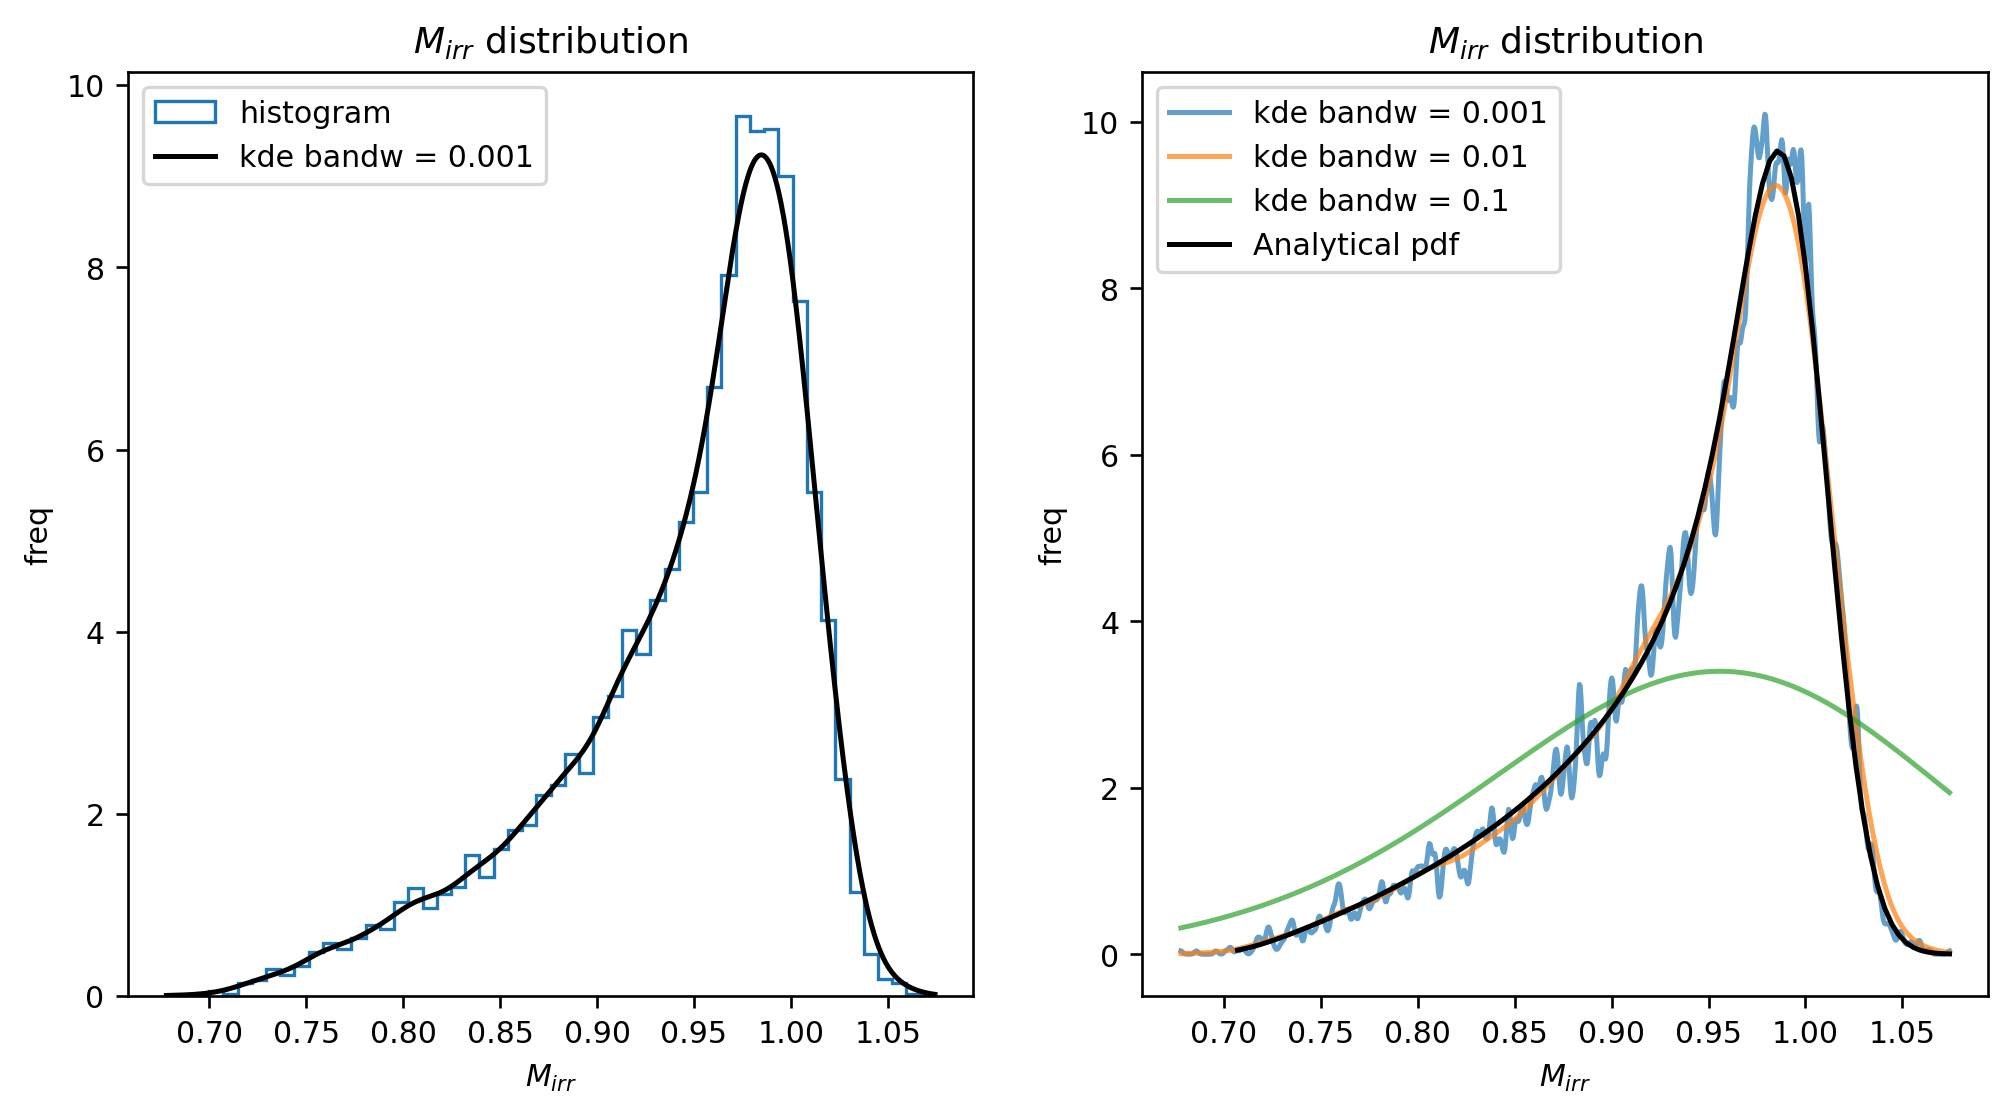

In [199]:
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad

kernel = 'gaussian'
bandwidth_list = [0.001, 0.01, 0.1]
pdf_list = []
xgrid = np.linspace(m_irr.min(),m_irr.max(),1000)  

#-------  Plt params  ----------------
%config InlineBackend.figure_format='retina'
plt.rc('figure', figsize=(10, 5), dpi=120)
plt.rcParams.update({'font.size': 9})
#--------------------------------------------

fig, ax = plt.subplots(1,2)

for i,bandwidth in enumerate(bandwidth_list):

    kde = KernelDensity(bandwidth = bandwidth,  kernel=kernel)
    kde.fit(m_irr[:, np.newaxis])   
    logl = kde.score_samples(xgrid[:,np.newaxis])
    pdf = np.exp(logl)
    pdf_list.append(pdf)

    ax[1].plot(xgrid, pdf, label=f'kde bandw = {bandwidth_list[i]}', alpha=0.7)


def integrand(f,x):
    return ((2/np.pi)**0.5 / sigma ) * np.exp(-(x/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

xgrid2 = np.linspace(1/np.sqrt(2), m_irr.max(), 100)
m_irr_analytical = [quad(lambda f: integrand(f,x), 1/2**0.5,1)[0] for x in xgrid2]

ax[1].plot(xgrid2, m_irr_analytical, color='k', label='Analytical pdf')
ax[1].legend(loc='upper left')
ax[1].set_title(r'$M_{irr}$ distribution')
ax[1].set_xlabel(r'$M_{irr}$')
ax[1].set_ylabel('freq');


ax[0].hist(m_irr, bins='fd', density=True, histtype='step', label='histogram')
ax[0].plot(xgrid, pdf_list[1], label=f'kde bandw = {bandwidth_list[0]}', color='k')
ax[0].legend(loc='upper left')
ax[0].set_title(r'$M_{irr}$ distribution')
ax[0].set_xlabel(r'$M_{irr}$')
ax[0].set_ylabel('freq');


Let's see how the shape changes with big or small $\sigma$ compared to $\mu$

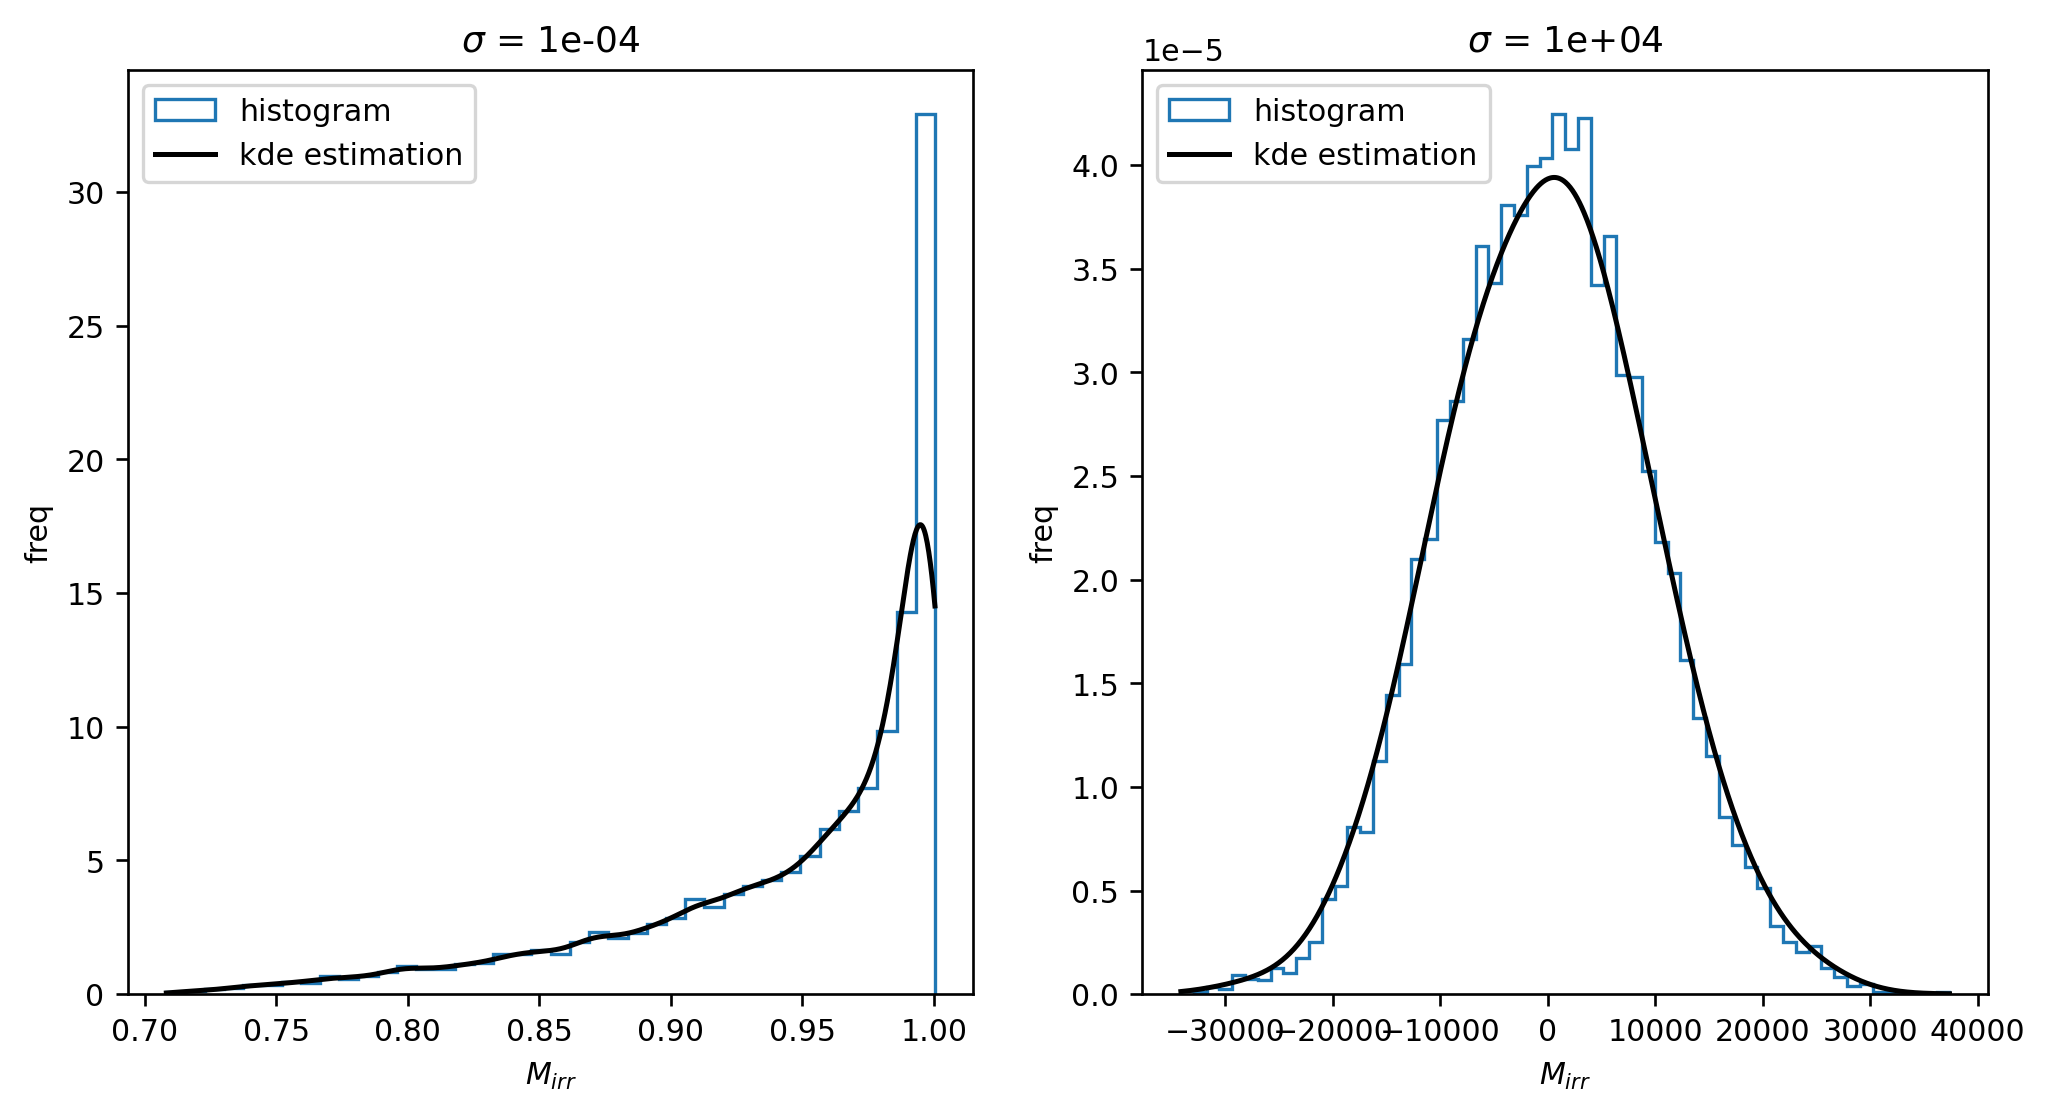

In [185]:

sigma_l = [1E-4, 1E4]
bandw = [0.007,3000]
mu = 1
n = 10000 # number of samples
spin = uniform.rvs(size = n, random_state = seed)

#-------  Plt params  ----------------
%config InlineBackend.figure_format='retina'
plt.rc('figure', figsize=(10, 5), dpi=120)
plt.rcParams.update({'font.size': 9})
#--------------------------------------------

fig, ax = plt.subplots(1,2)

for i,sigma in enumerate(sigma_l):

    mass = norm(loc=mu, scale = sigma).rvs(size=n)

    f = np.sqrt((1+np.sqrt(1-spin**2))/2)
    m_irr = mass * f

    kernel = 'gaussian'
    kde = KernelDensity(bandwidth = bandw[i],  kernel=kernel)
    kde.fit(m_irr[:, np.newaxis])

    xgrid = np.linspace(m_irr.min(),m_irr.max(),1000)  
    logl = kde.score_samples(xgrid[:,np.newaxis])
    pdf = np.exp(logl)
    
    ax[i].hist(m_irr, bins='fd', density=True, histtype='step', label='histogram')
    ax[i].plot(xgrid, pdf, label='kde estimation', color='k')
    ax[i].legend(loc='upper left')
    ax[i].set_title(f'$\sigma$ = {sigma:.0e}')
    ax[i].set_xlabel(r'$M_{irr}$')
    ax[i].set_ylabel('freq');
        

We actually see that $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$, and like $M$ if  $\sigma\gg \mu$.

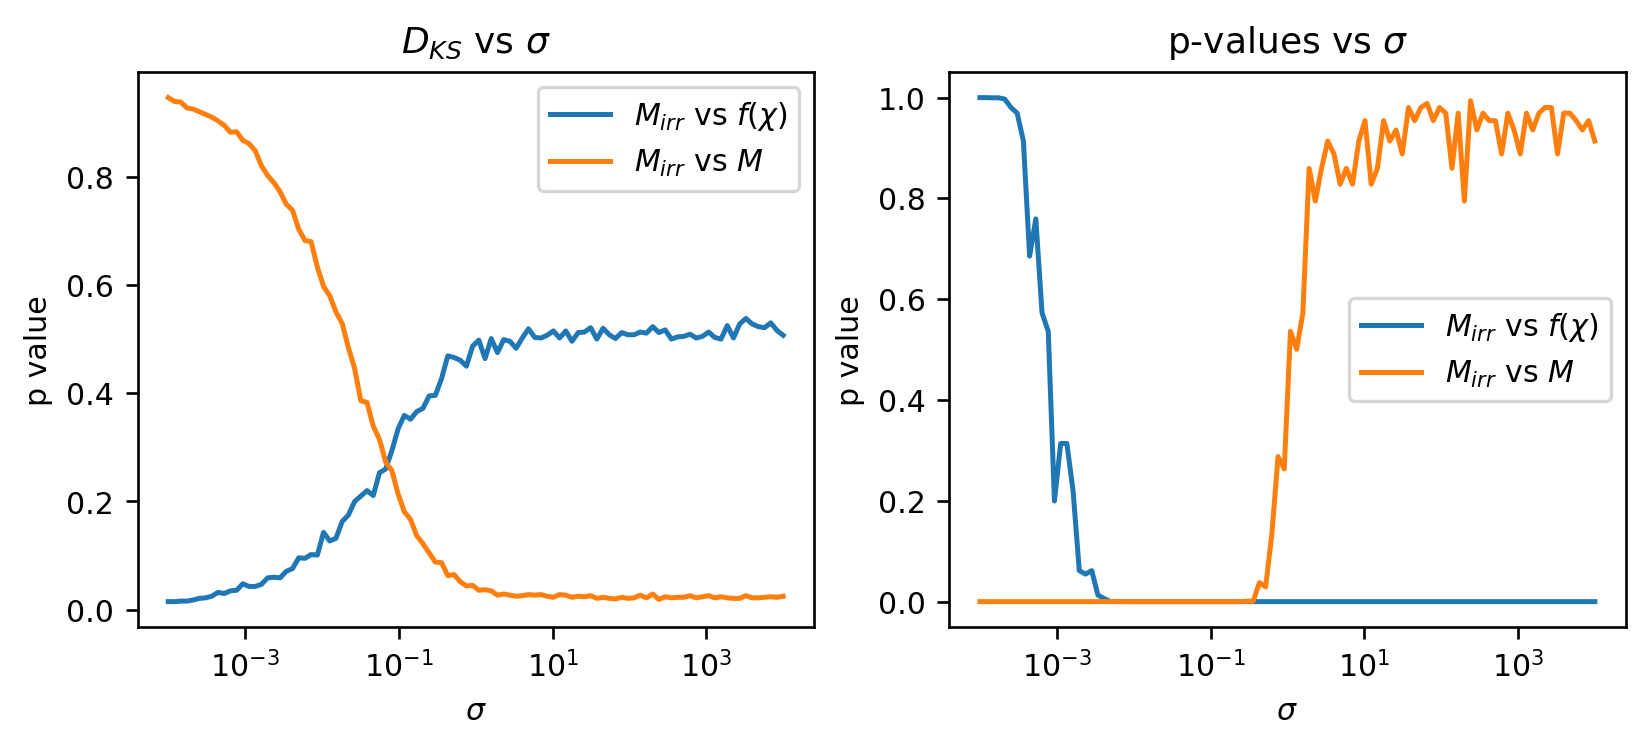

In [181]:
from scipy.stats import kstest

sigma_list = np.logspace(-4, 4, 100 )
test_mirr_f = []
test_mirr_m = []

for sigma in sigma_list:
    mu = 1
    n = 1000 # number of samples

    spin = uniform.rvs(size = n, random_state = seed)
    mass = norm(loc=mu, scale = sigma).rvs(size=n)

    f = np.sqrt((1+np.sqrt(1-spin**2))/2)
    m_irr = mass * f

    test_mirr_f.append(kstest(m_irr, f))
    test_mirr_m.append(kstest(m_irr, mass))

#-------  Plt params  ----------------
%config InlineBackend.figure_format='retina'
plt.rc('figure', figsize=(8, 3), dpi=120)
plt.rcParams.update({'font.size': 9})
#--------------------------------------------

fig, ax = plt.subplots(1,2)

ax[0].plot(sigma_list, [x[0] for x in test_mirr_f], label=r'$M_{irr}$ vs $f(\chi)$')
ax[0].plot(sigma_list, [x[0] for x in test_mirr_m], label=r'$M_{irr}$ vs $M$')
ax[0].legend()
ax[0].set_title(r'$D_{KS}$ vs $\sigma$')
ax[0].set_xlabel(r'$\sigma$')
ax[0].set_ylabel('p value');
ax[0].semilogx()

ax[1].plot(sigma_list, [x[1] for x in test_mirr_f], label=r'$M_{irr}$ vs $f(\chi)$')
ax[1].plot(sigma_list, [x[1] for x in test_mirr_m], label=r'$M_{irr}$ vs $M$')
ax[1].legend()
ax[1].set_title(r'p-values vs $\sigma$')
ax[1].set_xlabel(r'$\sigma$')
ax[1].set_ylabel('p value');
ax[1].semilogx();


We now have a quantitative measure of the distributions similarities we showed before for just 2 values of $\sigma$